# Verifying FrozenPy works as I develop it
__Notebooked created by:__ Michael Totty

__Aim:__ To make sure shit works as intended

__Change Log:__

3/20/2020 - Created

In [1]:
# ===============================================
# Import essential modules
# ===============================================

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from FrozenPy import *

# Plot formatting
%matplotlib inline
sns.set(style="ticks", color_codes=True)

# Import FrozenPy functions
# this will need to change depending on MedPC.py locations
path = '/Users/home/Documents/Jupyter/FrozenPy'
os.chdir(path)

## TODO: 

[X] Seperate flight from standard function

[X] Create function for formating data to statviews

[ ] Test FrozenPy against others data

[ ] Document all FrozenPy functions

[ ] Start on github documentation. Plotting functions should come after Frozen Py 0.1.0

## Making standard functions

Currently I made the functions in respect to fligh which has two CSs. Need to make a standad version. And maybe a bw function? Maybe later. 

In [2]:


def get_averagedslices(df,
                       Trials,
                       BL=180,
                       CS=10,
                       US=2,
                       ISI=58,
                       fs=5,
                       Behav='Freezing',
                       Group=[]):
    """Slices and averages data for baseline
    and individual stimuli within trials

    Parameters
    ----------
    df : pandas dataframe
        dataframe generated from Threshold2Freezing() 
    BL : int, optional
        length of baseline period in seconds
    CS : int, optional
        lengths of CS in seconds
    US : int, optional
        length in seconds of US
    ISI : int, optional
        lenth in seconds of ISI
    Trials : int, optional
        numbers of trials
    fs : int, optional
        sampling frequency (default=5 Hz)
    Behav : str
        desired behavioral data ('Freezing' or 'Threshold'; default='Freezing')
    Group: str
        group metadata to assign. mainly useful for within-subjects data where
            the same subjects have different experimental conditions.
            Leave as default if not within-subjects.

    Returns
    -------
    BL_df
        a pandas dataframe with the averaged baseline data
    Trials_df
        a pandas dataframe with averaged CS, US, and ISI data
    """

    # Housekeeping
    if 'Time' in df:
        # drop 'Time' column
        df.drop('Time', axis=1, inplace=True)

    # Baseline
    # get IDs
    ID = df.xs(Behav).columns
    # BL timestamps
    BL_timestamps = [0, BL * fs]
    BL_data = df.xs(Behav)[BL_timestamps[0]:BL_timestamps[1]].mean(
    ).values  # slice and average data
    # BL dataframe
    dict4pandas = {'ID': ID, 'BL': BL_data}
    BL_df = pd.DataFrame(dict4pandas)

    # Trial prep
    # ID metadata
    ID_metadata = np.tile(ID, Trials)
    # trial metadata length of n_rats
    Trial_metadata = [
        ele for ele in range(1, Trials + 1) for i in range(len(ID))
    ]
    ITI = CS + US + ISI  # ITI length

    #  CS
    CS_data = slicedata(
        df,
        n_trials=Trials,
        start_time=BL,  # slice data
        length=CS,
        ITI=ITI)
    dict4pandas = {
        'ID': ID_metadata,
        'Trial': Trial_metadata,
        'CS': CS_data
    }  # CS dataframe
    CS_df = pd.DataFrame(dict4pandas)

    #  US
    start_time = BL + CS  # start time
    US_data = slicedata(
        df,
        n_trials=Trials,
        start_time=start_time,  # slice data
        length=US,
        ITI=ITI)
    dict4pandas = {
        'ID': ID_metadata,
        'Trial': Trial_metadata,
        'US': US_data
    }  # US dataframe
    US_df = pd.DataFrame(dict4pandas)

    #  ISI
    start_time = BL + CS + US  # start time
    ISI_data = slicedata(
        df,
        n_trials=Trials,
        start_time=start_time,  # slice data
        length=ISI,
        ITI=ITI)
    dict4pandas = {
        'ID': ID_metadata,
        'Trial': Trial_metadata,
        'ISI': ISI_data
    }  # ISI dataframe
    ISI_df = pd.DataFrame(dict4pandas)

    # Make Trials df
    # combine CS and US data
    Trials_df = pd.merge(CS_df, US_df, on=['ID', 'Trial'], copy='True')
    Trials_df = pd.merge(Trials_df, ISI_df, on=['ID', 'Trial'],
                         copy='True')  # add ISI data

    # Add Group metadata, if any
    if any(Group):

        Group_metadata = [ele for ele in [Group] for i in range(len(ID))
                          ]  # group metadata

        # group dataframe
        dict4pandas = {'ID': ID, 'Group': Group_metadata}
        Group_df = pd.DataFrame(dict4pandas)

        # merge group df to others
        BL_df = pd.merge(Group_df, BL_df, on='ID', copy='True')  # BL + group
        Trials_df = pd.merge(Group_df, Trials_df, on='ID',
                             copy='True')  # Trials + group

    return BL_df, Trials_df

## Now we need to test that this works

Let's do this by loading some non-flight data and see what it looks like.

In [2]:
# Directory containing .out files
Cond_dir = '/Volumes/labshare/Michael Totty/Experiments/CRH IED/1. CeA CRH hM4D pilot/Data/0. FrozenPy test'


# Read .out files from pre-specified directory
readOut(Cond_dir)


# Read in .raw.csv file
os.chdir(Cond_dir)
Cond_S1 = readRaw('20200323 - CRH IED - Cond - Sq 1.raw.csv')
Cond_S2 = readRaw('20200323 - CRH IED - Cond - Sq 2.raw.csv')
Cond_S3 = readRaw('20200323 - CRH IED - Cond - Sq 3.raw.csv')


# Freezing to Threshold
Cond_Sq1_df = calculateFreezing(Cond_S1)
Cond_Sq2_df = calculateFreezing(Cond_S2)
Cond_Sq3_df = calculateFreezing(Cond_S3)

# Concatenate all squad dataframes
Cond_df = pd.concat([Cond_Sq1_df, Cond_Sq2_df, Cond_Sq3_df], axis=1)
# display(Cond_df)

20200323 - CRH IED - Cond - Sq 1.raw.csv already exists. Delete to rewrite file.
20200323 - CRH IED - Cond - Sq 2.raw.csv already exists. Delete to rewrite file.
20200323 - CRH IED - Cond - Sq 3.raw.csv already exists. Delete to rewrite file.
Done!
Dropped "DELETE" columns in 20200323 - CRH IED - Cond - Sq 1.raw.csv
Dropped "DELETE" columns in 20200323 - CRH IED - Cond - Sq 2.raw.csv
Dropped "DELETE" columns in 20200323 - CRH IED - Cond - Sq 3.raw.csv


In [3]:
# Slice data
BL_df, Trials_df = get_averagedslices(df=Cond_df,Trials=5,ISI=58)

#display(BL_df)
#display(Trials_df)

### Load metadata and merge

In [4]:
# metadata directory
metadata_dir = '/Volumes/labshare/Michael Totty/Experiments/CRH IED/1. CeA CRH hM4D pilot/Data'

# load metadata
os.chdir(metadata_dir)
file = 'CRH_IED.metadata.csv'
Metadata_df = pd.read_csv(file, sep=',')

# merge metadata to BL and Trial dfs
BL_md_df = pd.merge(Metadata_df, BL_df, on='ID', copy='True')
Trials_md_df = pd.merge(Metadata_df, Trials_df, on='ID', copy='True')



### Plot

Text(0, 0.5, '% Freezing')

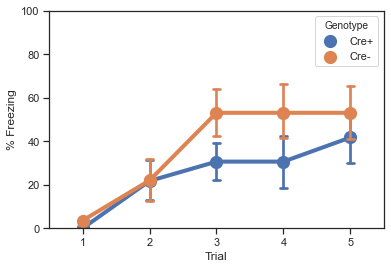

In [5]:

g = sns.pointplot(data=Trials_md_df,
                  x='Trial', y='CS', hue='Genotype',
                  scale=1.5, ci=68, capsize=.1)
plt.ylim(0, 100)
plt.ylabel('% Freezing')

Awesome, this works pretty well. Now let's look at how to 'unmelt' pandas dataframes into a stateview like format. 

## Reformatting 



In [6]:
Trials_md_df.head()

,ID,Genotype,Sex,Trial,CS,US,ISI
0,CRH1,Cre+,Male,1,0.0,0.0,0.000000
1,CRH1,Cre+,Male,2,32.0,0.0,2.413793
2,CRH1,Cre+,Male,3,20.0,0.0,10.344828
3,CRH1,Cre+,Male,4,12.0,50.0,15.517241
4,CRH1,Cre+,Male,5,82.0,30.0,26.551724


In [7]:
new_df = Trials_md_df.pivot_table(index=['ID', 'Sex', 'Genotype'], 
                                  columns='Trial', values=['CS', 'US', 'ISI'])
new_df.head()

CS                                ISI             \
Trial                    1     2     3     4     5          1          2   
ID    Sex    Genotype                                                      
CRH1  Male   Cre+      0.0  32.0  20.0  12.0  82.0   0.000000   2.413793   
CRH10 Female Cre+      0.0  34.0  52.0  10.0  10.0  14.482759  14.827586   
CRH11 Female Cre+      0.0   0.0   0.0   0.0   0.0   0.000000   0.000000   
CRH12 Male   Cre-      0.0   0.0  10.0  38.0  10.0   5.517241  15.172414   
CRH13 Male   Cre-      0.0  16.0  46.0  80.0  66.0   4.137931  40.344828   

                                                         US                   \
Trial                          3          4          5    1    2     3     4   
ID    Sex    Genotype                                                          
CRH1  Male   Cre+      10.344828  15.517241  26.551724  0.0  0.0   0.0  50.0   
CRH10 Female Cre+       8.620690   1.724138  20.689655  0.0  0.0  10.0   0.0   
CRH11 Female Cre+       0.000000   0.000000   4.827586  0.0  0.0   0.0   0.0   
CRH12 Male   Cre-       8.620690  25.517241  39.310345  0.0  0.0   0.0   0.0   
CRH13 Male   Cre-      33.448276  43.448276  49.310345  0.0  0.0   0.0  20.0   

                             
Trial                     5  
ID    Sex    Genotype        
CRH1  Male   Cre+      30.0  
CRH10 Female Cre+       0.0  
CRH11 Female Cre+       0.0  
CRH12 Male   Cre-      20.0  
CRH13 Male   Cre-      20.0

Perfect! That was a lot easier than I thought.